In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 导入数据

In [2]:
columns = ['use_id', 'order_date', 'order_number', 'order_acount']

In [4]:
data = pd.read_table('data.txt',names = columns, sep = '\s+')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
use_id          69659 non-null int64
order_date      69659 non-null int64
order_number    69659 non-null int64
order_acount    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 静态分析

In [5]:
data.head(5)

,use_id,order_date,order_number,order_acount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [7]:
 data['order_number'].describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: order_number, dtype: float64

In [9]:
 data['order_acount'].describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: order_acount, dtype: float64

In [18]:
data.groupby('use_id').sum()[['order_acount','order_number']].describe()

,order_acount,order_number
count,23570.000000,23570.000000
mean,106.080426,7.122656
std,240.925195,16.983531
min,0.000000,1.000000
25%,19.970000,1.000000
50%,43.395000,3.000000
75%,106.475000,7.000000
max,13990.930000,1033.000000


可见每个用户，最少购买1单，最多购买1033单，平均数和Q分位都集中在小额订单，大部分都只是购买3单左右。

### 动态分析

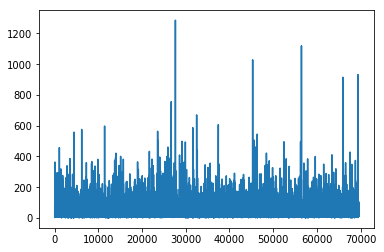

In [10]:
plt.plot(data['order_acount'])

In [19]:
from datetime import datetime

In [24]:
data['order_date'] = pd.to_datetime(data.order_date,format = '%Y%m%d')

In [28]:
data['month'] = data.order_date.astype('datetime64[M]')

In [29]:
data.head()

,use_id,order_date,order_number,order_acount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F087F4E10>,
      dtype=object)

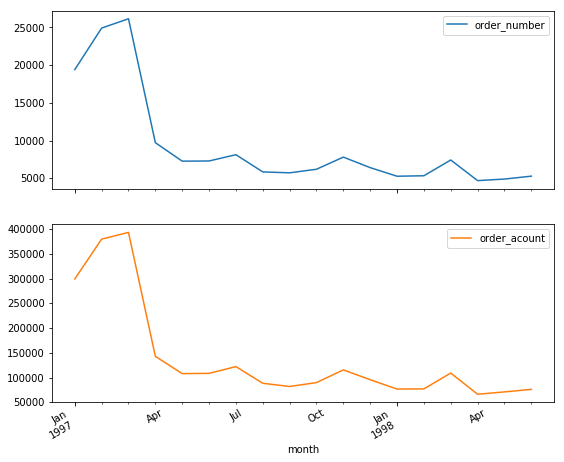

In [38]:
data.groupby('month')[['order_number', 'order_acount']].sum().plot(kind = 'line', subplots = True, figsize = (9, 8))

由此可见，消费者在第一季度消费水平较高。

### 购买数量分析

In [41]:
#用户第一次消费时间
data.groupby('use_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [42]:
#用户最后一次消费时间
data.groupby('use_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

### 各月复购率、回购率分析

In [49]:
pivot_counts = data.pivot_table(index='use_id',columns='month',values='order_acount',aggfunc='count').fillna(0)

In [53]:
column_month = data['month'].astype('str').sort_values().unique()

In [56]:
pivot_counts.columns=column_month

In [57]:
pivot_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
pivot_counts_re = pivot_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)

In [60]:
pivot_counts_re.head(3)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


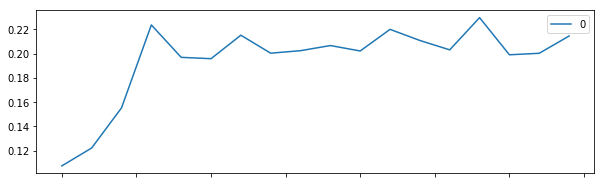

In [65]:
pd.DataFrame(pivot_counts_re.sum() / pivot_counts_re.count()).plot(figsize=(10,3))

在最开始的时候，复购率不高，有前三季度大量新客户涌入，后面复购率维持在一定较高的水平上。

In [68]:
# 回购率指某一段时间内消费的用户，在下一个时段内仍消费的比例
pivoted_amount = data.pivot_table(index = 'use_id', columns = 'month', values = 'order_acount', aggfunc = 'mean').fillna(0)

In [69]:
column_month = data.month.sort_values().astype('str').unique()
pivoted_amount.column = column_month

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [70]:
pivoted_amount.head(3)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
use_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.0,0.0,0.0,0.0,0.0,0.0,39.205,0.0,0.0,0.0,0.0,0.0,16.99,0.0


In [72]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)

In [73]:
pivoted_purchase.head(3)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
use_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [81]:
def purchase_last(data):
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status         

In [82]:
pivoted_purchase_return = pivoted_purchase.apply(purchase_last, axis = 1)

In [83]:
column_month = data.month.sort_values().astype('str').unique()

In [85]:
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = column_month, index = pivoted_purchase.index)

In [86]:
pivoted_purchase_return1.head(3)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


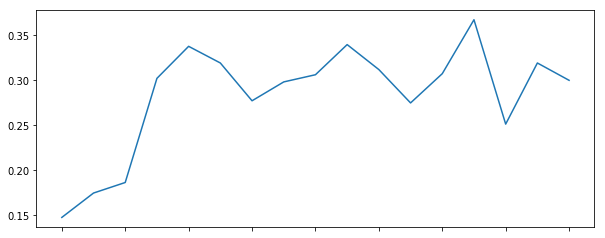

In [88]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))